In [45]:
%pylab inline
from scipy.integrate import odeint


Populating the interactive namespace from numpy and matplotlib


# Homework 1

In [76]:
def physics(Δt, x):
    if x[0] < 1.:    
        g = 9.8
        R = ( (1 + 2*x[0]**2)**(3/2) ) / 2
        m = 1
        u1 = x[0:2] / norm(x[0:2]) 
        F = (x[2:4]/R) - m*g*u1
        dx = array([1, 2*x[0], F[0], F[1]])  
        x += dx * Δt
    elif x[0] >=1:
        g=9.8
        dx = concatenate((x[2:4], -0.5*g*array([0., 1])), axis=None)   
        x += dx * Δt
    
        if x[1] <= 0 :
            x[1] = 0.
            x[3] = -x[3]*0.8
    return x

In [77]:
tf = 5.
Δt = 0.01    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([-3., 9., 0, 0])
x_log = [copy(x)]

for t in time:   
    x = physics(Δt, x)
    x_log.append(copy(x))
    
x_log = array(x_log)

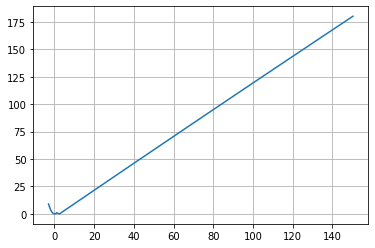

In [78]:
grid()
plot(x_log[:,0], x_log[:,1])
#plot(x_log[:, 3])

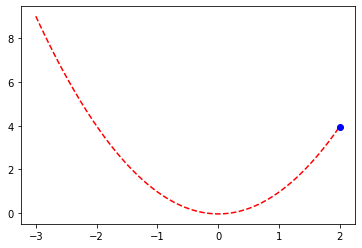

In [18]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())